In [1]:
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation,BatchNormalization, Flatten, Conv2D, MaxPooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay
import tensorflow as tf
import pydot
import os

2023-03-12 09:49:50.691609: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-12 09:49:56.586019: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-12 09:49:56.586113: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-12 09:50:09.151036: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [2]:
train_dir='train_frames'
test_dir='test_frames'

In [3]:
os.listdir(test_dir)

['Bye',
 'Work ',
 'House',
 'No',
 'Nice',
 'Good',
 'Yes ',
 'Hello',
 'Thank You',
 'Morning',
 'Welcome ']

In [4]:
labels=['Bye','Work ','House','No','Nice','Good','Yes ','Hello','Thank You','Morning','Welcome ']

In [5]:
#Datasets parameters
BATCH_SIZE = 32
IMG_SIZE = (227,227)
num_of_test_samples=7589

In [6]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [30]:
test_generator = test_datagen.flow_from_directory(test_dir,IMG_SIZE,
                                                        batch_size=BATCH_SIZE,
                                                        class_mode='categorical')

Found 7589 images belonging to 11 classes.


In [34]:
train_dataset = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                            shuffle=True,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE)

test_dataset = tf.keras.utils.image_dataset_from_directory(test_dir,
                                                            shuffle=True,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE)

Found 7850 files belonging to 11 classes.
Found 7589 files belonging to 11 classes.


In [40]:
test_dataset = test_datagen.flow_from_directory(test_dir,IMG_SIZE,shuffle=True,
                                                batch_size=BATCH_SIZE,class_mode='categorical' )

Found 7589 images belonging to 11 classes.


In [9]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

In [10]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.2),
])

In [11]:
path = 'train_frames'
train_datagen = ImageDataGenerator(rescale=1. / 255)
train = train_datagen.flow_from_directory(path, target_size=(227,227), class_mode='categorical')

Found 7850 images belonging to 11 classes.


In [12]:
print("Batch Size for Input Image : ",train[0][0].shape)
print("Batch Size for Output Image : ",train[0][1].shape)
print("Image Size of first image : ",train[0][0][0].shape)
print("Output of first image : ",train[0][1][0].shape)

Batch Size for Input Image :  (32, 227, 227, 3)
Batch Size for Output Image :  (32, 11)
Image Size of first image :  (227, 227, 3)
Output of first image :  (11,)


/home/hena/.local/lib/python3.10/site-packages/matplotlib/text.py:1241: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Text(0.5, 1.0, '[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]')

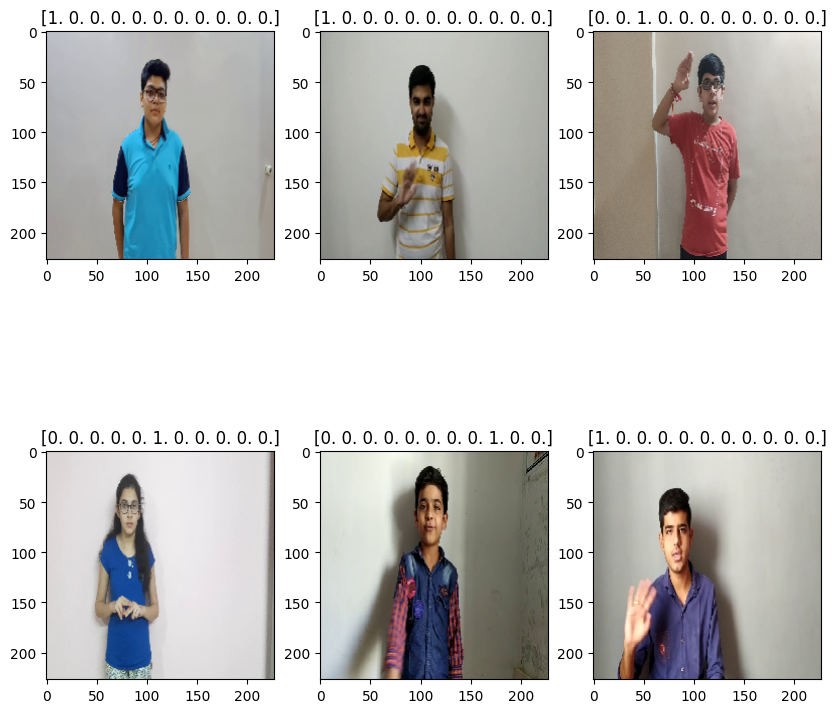

In [13]:
fig , axs = plt.subplots(2,3 ,figsize = (10,10))
axs[0][0].imshow(train[0][0][12])
axs[0][0].set_title(train[0][1][12])
axs[0][1].imshow(train[0][0][10])
axs[0][1].set_title(train[0][1][10])
axs[0][2].imshow(train[0][0][5])
axs[0][2].set_title(train[0][1][5])
axs[1][0].imshow(train[0][0][20])
axs[1][0].set_title(train[0][1][20])
axs[1][1].imshow(train[0][0][25])
axs[1][1].set_title(train[0][1][25])
axs[1][2].imshow(train[0][0][3])
axs[1][2].set_title(train[0][1][3])

In [14]:
def AlexNet(input_shape):
    
    X_input = Input(input_shape)
    
    X = Conv2D(96,(11,11),strides = 4,name="conv0")(X_input)
    X = BatchNormalization(axis = 3 , name = "bn0")(X)
    X = Activation('relu')(X)
    
    X = MaxPooling2D((3,3),strides = 2,name = 'max0')(X)
    
    X = Conv2D(256,(5,5),padding = 'same' , name = 'conv1')(X)
    X = BatchNormalization(axis = 3 ,name='bn1')(X)
    X = Activation('relu')(X)
    
    X = MaxPooling2D((3,3),strides = 2,name = 'max1')(X)
    
    X = Conv2D(384, (3,3) , padding = 'same' , name='conv2')(X)
    X = BatchNormalization(axis = 3, name = 'bn2')(X)
    X = Activation('relu')(X)
    
    X = Conv2D(384, (3,3) , padding = 'same' , name='conv3')(X)
    X = BatchNormalization(axis = 3, name = 'bn3')(X)
    X = Activation('relu')(X)
    
    X = Conv2D(256, (3,3) , padding = 'same' , name='conv4')(X)
    X = BatchNormalization(axis = 3, name = 'bn4')(X)
    X = Activation('relu')(X)
    
    X = MaxPooling2D((3,3),strides = 2,name = 'max2')(X)
    
    X = Flatten()(X)
    
    X = Dense(4096, activation = 'relu', name = "fc0")(X)
    
    X = Dense(4096, activation = 'relu', name = 'fc1')(X) 
    
    X = Dense(11,activation='softmax',name = 'fc2')(X)
    
    model = Model(inputs = X_input, outputs = X, name='AlexNet')
    return model

In [15]:
alex = AlexNet(train[0][0].shape[1:])

In [16]:
alex.summary()

Model: "AlexNet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 227, 227, 3)]     0         
                                                                 
 conv0 (Conv2D)              (None, 55, 55, 96)        34944     
                                                                 
 bn0 (BatchNormalization)    (None, 55, 55, 96)        384       
                                                                 
 activation (Activation)     (None, 55, 55, 96)        0         
                                                                 
 max0 (MaxPooling2D)         (None, 27, 27, 96)        0         
                                                                 
 conv1 (Conv2D)              (None, 27, 27, 256)       614656    
                                                                 
 bn1 (BatchNormalization)    (None, 27, 27, 256)       1024

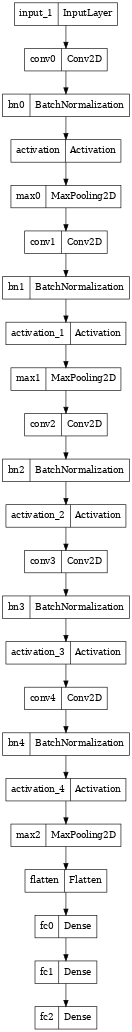

In [17]:
tf.keras.utils.plot_model(
    alex, to_file='alex.png', show_shapes=False, show_layer_names=True,
    rankdir='TB', expand_nested=True, dpi=45
)


In [18]:
base_learning_rate = 0.0001
alex.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [19]:
history = alex.fit(train_dataset,
                    epochs=10,
                    validation_data=test_dataset)

Epoch 1/10


/home/hena/.local/lib/python3.10/site-packages/keras/backend.py:5585: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


246/246 [==============================] - 1174s 5s/step - loss: 1.5206 - accuracy: 0.5645 - val_loss: 0.8728 - val_accuracy: 0.7192
Epoch 2/10
246/246 [==============================] - 1287s 5s/step - loss: 0.1859 - accuracy: 0.9457 - val_loss: 0.1281 - val_accuracy: 0.9675
Epoch 3/10
246/246 [==============================] - 1275s 5s/step - loss: 0.0488 - accuracy: 0.9869 - val_loss: 0.0520 - val_accuracy: 0.9870
Epoch 4/10
246/246 [==============================] - 1314s 5s/step - loss: 0.0572 - accuracy: 0.9841 - val_loss: 0.4871 - val_accuracy: 0.8215
Epoch 5/10
246/246 [==============================] - 1346s 5s/step - loss: 0.1150 - accuracy: 0.9634 - val_loss: 0.0407 - val_accuracy: 0.9862
Epoch 6/10
246/246 [==============================] - 1357s 6s/step - loss: 0.0284 - accuracy: 0.9934 - val_loss: 0.0331 - val_accuracy: 0.9935
Epoch 7/10
246/246 [==============================] - 1313s 5s/step - loss: 0.0362 - accuracy: 0.9897 - val_loss: 0.1835 - val_accuracy: 0.9494
Epo

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

In [21]:
loss = history.history['loss']
val_loss = history.history['val_loss']

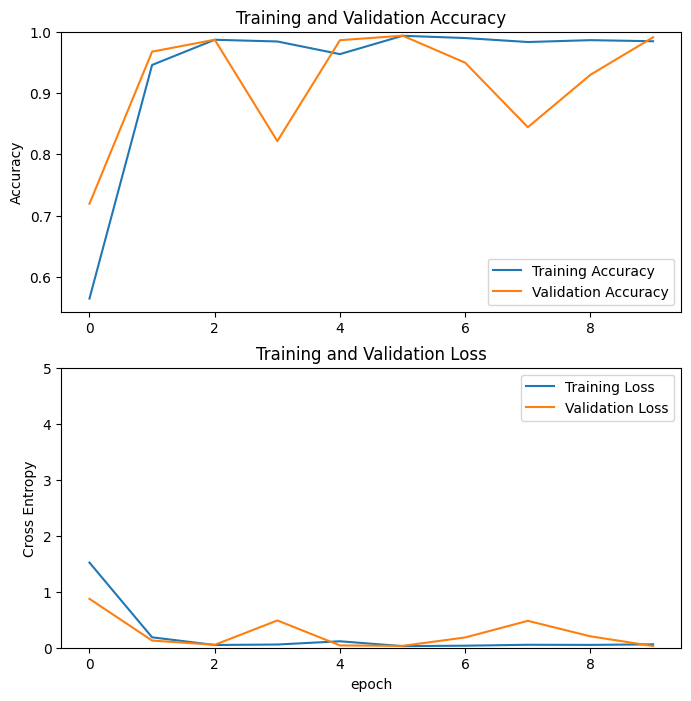

In [22]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,5.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [27]:
Y_pred = alex.predict(test_dataset)

238/238 [==============================] - 152s 633ms/step


In [32]:
y_pred = np.argmax(Y_pred, axis=1)

In [33]:
test_generator.classes

array([ 0,  0,  0, ..., 10, 10, 10], dtype=int32)

In [41]:
cm = confusion_matrix(test_dataset.classes, y_pred)

In [42]:
print(cm)

[[67 73 72 50 44 72 48 66 68 73 58]
 [52 48 58 58 51 77 41 63 69 68 68]
 [56 56 70 61 82 73 52 62 66 57 59]
 [63 80 52 67 57 62 46 69 52 70 65]
 [61 58 71 50 63 62 52 75 51 74 54]
 [74 72 73 67 55 66 53 73 70 59 93]
 [34 37 62 53 46 66 50 54 49 54 67]
 [64 63 70 64 64 65 53 67 73 62 68]
 [57 59 69 73 66 69 44 53 72 67 61]
 [66 54 70 63 70 72 65 64 60 78 78]
 [74 71 73 77 54 71 49 59 65 78 56]]


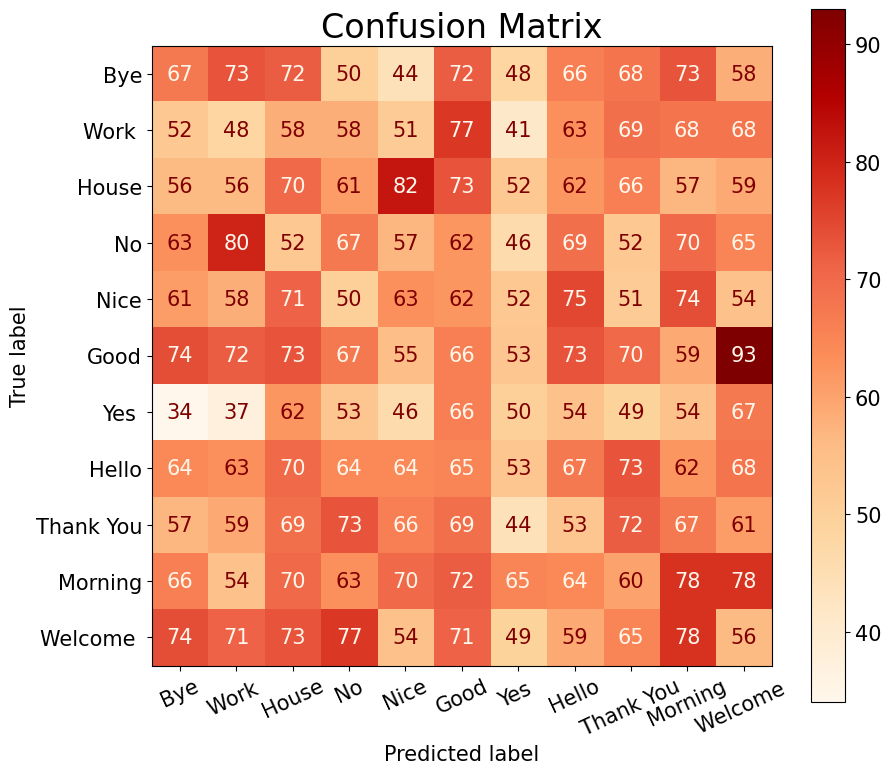

In [53]:
plt.rcParams['figure.figsize'] = (10.0, 9.0)
plt.rcParams['font.size'] = 15
display_c_m = ConfusionMatrixDisplay(cm, display_labels=labels)
display_c_m.plot(cmap='OrRd', xticks_rotation=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Confusion Matrix', fontsize=24)
plt.savefig('confusion_matrix.png', transparent=True, dpi=400)
plt.show()